In [2]:
using LinearAlgebra
using Plots
using DataFrames
using CSV

In [73]:
used_βs = 0:4
used_ts = 1:24
colors = theme_palette(:auto)
DUMP_DIR = joinpath(@__DIR__, "..", "dump", "cartpole-scale")
;

In [74]:
function loadDataFrame(t, method)
    if method == :deepsdp; mstr = "deepsdp__dual"
    elseif method == :chordal; mstr = "chordal__single_decomp"
    elseif method == :chordal2; mstr = "chordal__double_decomp"
    else error("Unsupported method: $(method)") 
    end
    filepath = joinpath(DUMP_DIR, "cartpole_t$(t)_$(mstr).csv")
    return CSV.File(filepath)
end


# Order these by (method, beta) -> df
deepsdp_dfs = [loadDataFrame(t, :deepsdp) for t in used_ts]
# chordal_dfs = [loadDataFrame(t, :chordal) for t in used_ts]
chordal_dfs = [loadDataFrame(t, :chordal) for t in 1:11]
chordal2_dfs = [loadDataFrame(t, :chordal2) for t in used_ts]
;

In [75]:
# dfs are ordered by t
function plotMethodDfs(ddfs, cdfs, c2dfs; skip_chordal = false)
    lenβs = length(used_βs)    
    marker_size, light, dark = 4, 0.2, 0.7
    plt = plot()
    
    # DeepSDP
    # curves[β] has the values for that β
    dcurves = [[df.total_secs[β] for df in ddfs] for β in 1:lenβs]    
    dcurve_mins = [minimum(df.total_secs) for df in ddfs]
    dcurve_maxs = [maximum(df.total_secs) for df in ddfs]
    plot!(plt, 1:length(used_ts), dcurves,
            color = colors[1],
            marker = (:circle, marker_size),
            alpha = dark,
            label = "")
    plot!(plt, 1:length(used_ts), dcurve_mins,
            color = colors[1],
            fillrange = dcurve_maxs,
            alpha = light,
            label = "DeepSDP")
    
    if !skip_chordal
        # Chordal
        ccurves = [[df.total_secs[β] for df in cdfs] for β in 1:lenβs]
        ccurve_mins = [minimum(df.total_secs) for df in cdfs]
        ccurve_maxs = [maximum(df.total_secs) for df in cdfs]
        plot!(plt, 1:length(used_ts), ccurves,
                color = colors[2],
                marker = (:circle, marker_size),
                alpha = dark,
                label = "")
        plot!(plt, 1:length(used_ts), ccurve_mins,
                color = colors[2],
                fillrange = ccurve_maxs,
                alpha = light,
                label = "ChordalSDP")
    end
        
    
    # Chordal2
    c2curves = [[df.total_secs[β] for df in c2dfs] for β in 1:lenβs]
    c2curve_mins = [minimum(df.total_secs) for df in c2dfs]
    c2curve_maxs = [maximum(df.total_secs) for df in c2dfs]
    plot!(plt, 1:length(used_ts), c2curves,
            color = colors[3],
            marker = (:circle, marker_size),
            alpha = dark,
            label = "")
    plot!(plt, 1:length(used_ts), c2curve_mins,
            color = colors[3],
            fillrange = c2curve_maxs,
            alpha = light,
            label = "ChordalSDP2")
    
    
    
    return plt
end

plotMethodDfs (generic function with 1 method)

In [76]:
# plt = plotMethodDfs(deepsdp_dfs, chordal_dfs, chordal2_dfs)

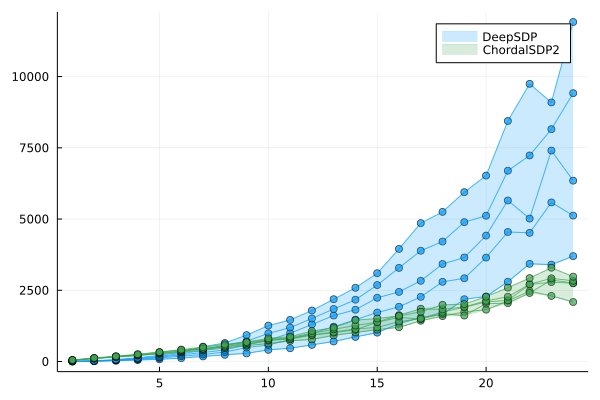

In [77]:
plt = plotMethodDfs(deepsdp_dfs, chordal_dfs, chordal2_dfs, skip_chordal=true)